In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta,datetime

In [2]:
ticker = 'CME_AD'

from data.pull_data import pull_quandl_sample_data, pull_custom_sample_data
data_df = pull_quandl_sample_data(ticker)

In [3]:
cpd_path = f'data/quandl_cpd_21lbw/{ticker}.csv'
thr = 0.98
day_boundary = 40

orig_cpd_df = pd.read_csv(cpd_path)

cpd_df = orig_cpd_df[orig_cpd_df.cp_score >=thr]
cpd_df = cpd_df.sort_values('cp_location')
last = [] # t,score

# The strategy is to keep a certain window (day_boundary) and only accept the point with the largest score in this window
changepoints = []
for _, row in cpd_df.iterrows():
    if not last or row.cp_score > last[1]:
        last = ([row.cp_location, row.cp_score])
    
    if row.cp_location - day_boundary > last[0]:
        changepoints.append([datetime.strptime(row.date, '%Y-%m-%d') - timedelta(int(row.t - last[0])), last[1], last[0]])
        last = []

# Alternatively, selecting change points based on its scores. First sort the scores and select the change points with top scores
changepoints2 = []
number_of_change_points = 50
cpd_df = cpd_df.sort_values('cp_score')
for _, row in cpd_df.iterrows():
    if len(changepoints2) >= number_of_change_points:
        break
    changepoints2.append([datetime.strptime(row.date, '%Y-%m-%d') - 
                          timedelta(int(row.t - row.cp_location)), row.cp_score])
len(changepoints), len(changepoints2)

(60, 50)

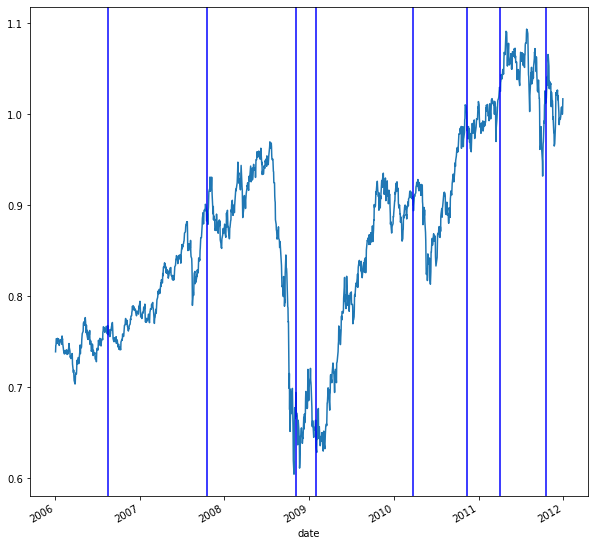

In [4]:
lower = datetime(2006, 1, 1)
upper = datetime(2012, 1, 1)
data_df['close'][lower: upper].plot(figsize=(10,10))
for d, score,_ in changepoints:
    if lower < d < upper:
        plt.axvline(x = d, color = 'b', alpha = score, label = 'axvline - full height')
